In [57]:
#@title Parameters: Input
# Altergo parameters

Guaranteed_Availability = "97"
LD_rate_per_1Percent = "3300"
MaxStr = "151"
year = "2021"


In [56]:
Guaranteed_Availability = int(Guaranteed_Availability)
LD_rate_per_1Percent = int(LD_rate_per_1Percent)
MaxStr = int(MaxStr)

# Libraries and data

In [6]:
# Matplotlib set of libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from datetime import datetime, timedelta
import glob
import os
%matplotlib inline

In [8]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


# Full year data: 2021

In [10]:
# merging the files
joined_files = os.path.join("/content/drive/Shareddrives/800 - Altergo/Data from customers/esVolta/Millikan_2021", "Log - *.csv")


# A list of all joined files is returned
joined_list = glob.glob(joined_files)

# Finally, the files are joined
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
print(df)

df_2021 = pd.DataFrame()
df_2021["LastUpdateTime"] = df["LastUpdateTime"]	
df_2021["FaultCode"] = df["FaultCode"]
df_2021["NumOfStringOnline"] = df["NumOfStringOnline"]
df_2021["MeterPower"] = df["MeterPower"]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


              ser  PCSID  ...  LowBessHumidity  AveBessHumidity
0        23986176      1  ...              362             1061
1        23986177      1  ...              362             1061
2        23986178      1  ...              362             1061
3        23986179      1  ...              362              375
4        23986180      1  ...              362              375
...           ...    ...  ...              ...              ...
5438757  29440264      1  ...              420             1231
5438758  29440265      1  ...              420              435
5438759  29440266      1  ...              420              435
5438760  29440267      1  ...              420             1231
5438761  29440268      1  ...              420             1231

[5438762 rows x 38 columns]


In [11]:
df_2021

,LastUpdateTime,FaultCode,NumOfStringOnline,MeterPower
0,2020-12-28 00:00:00,NaN,149,182.244
1,2020-12-28 00:00:05,NaN,149,-572.565
2,2020-12-28 00:00:11,NaN,149,-1365.330
3,2020-12-28 00:00:16,NaN,149,-1832.070
4,2020-12-28 00:00:22,NaN,149,-1044.040
...,...,...,...,...
5438757,2021-12-19 23:59:35,ESTOP/,128,0.000
5438758,2021-12-19 23:59:41,ESTOP/,128,0.000
5438759,2021-12-19 23:59:47,ESTOP/,128,0.000
5438760,2021-12-19 23:59:52,ESTOP/,128,0.000


### Check data consistency

In [12]:
df_2021['LastUpdateTime'] = pd.to_datetime(df_2021['LastUpdateTime']) # as datetime
df_2021 = df_2021.set_index('LastUpdateTime') # time as index - easier to manage this way

In [13]:
duration_2021 = df_2021.index.max() - df_2021.index.min()
duration_2021_hours = round(duration_2021.total_seconds()/(60*60),1)
duration_2021_hours/24

357.0

In [14]:
df_2021.index.min(), df_2021.index.max()

(Timestamp('2020-12-28 00:00:00'), Timestamp('2021-12-19 23:59:58'))

Picking only 2021 data

In [15]:
df_2021 = df_2021.loc[year]

In [17]:
df_2021.index.min(), df_2021.index.max()

(Timestamp('2021-01-01 00:00:05'), Timestamp('2021-12-19 23:59:58'))

### Frequency

In [16]:
duration_2021.total_seconds()/df_2021.shape[0]

5.736136015285057

Check for duplicates

In [18]:
df_2021[df_2021.index.duplicated()]

,FaultCode,NumOfStringOnline,MeterPower
LastUpdateTime,,,
2021-03-29,NaN,141,-500.81400
2021-05-10,NaN,140,-420.94000
2021-05-24,NaN,141,-999.91500
2021-07-12,NaN,140,-4.32990
2021-08-23,NaN,141,-2011.84000
2021-09-27,NaN,141,-4.66180
2021-10-25,NaN,149,-4.49705


In [19]:
# Drop duplicates
df_2021 = df_2021.drop_duplicates()

In [20]:
df = df_2021.sort_index()

### Encode FaultCodes

In [21]:
# Change to categories
df['FaultCode'] = df['FaultCode'].astype('category')
df['FaultCat'] = df['FaultCode'].cat.codes
dict(enumerate(df['FaultCode'].cat.categories))

{0: 'CF1/',
 1: 'CL2/',
 2: 'CTL0/',
 3: 'CTL0/IF1/',
 4: 'CTL0/IF1/IF2/',
 5: 'CTL0/IF1/IF3/',
 6: 'CTL0/IF2/',
 7: 'DCF23/',
 8: 'ESTOP/',
 9: 'ESTOP/CTL0/',
 10: 'SEQ1/',
 11: 'SEQ2/',
 12: 'SEQ2/ESTOP/',
 13: 'THM15/'}

### Add durations

Duration = difference of row 2 from row 1 timestamp

In [22]:
df['Duration'] = df.index.to_series().diff().dropna(axis=0, how='any')/np.timedelta64(1, 's')
df['Duration Hours'] = df.index.to_series().diff().dropna(axis=0, how='any')/np.timedelta64((3600), 's')

Text(0, 0.5, 'Duration Hours')

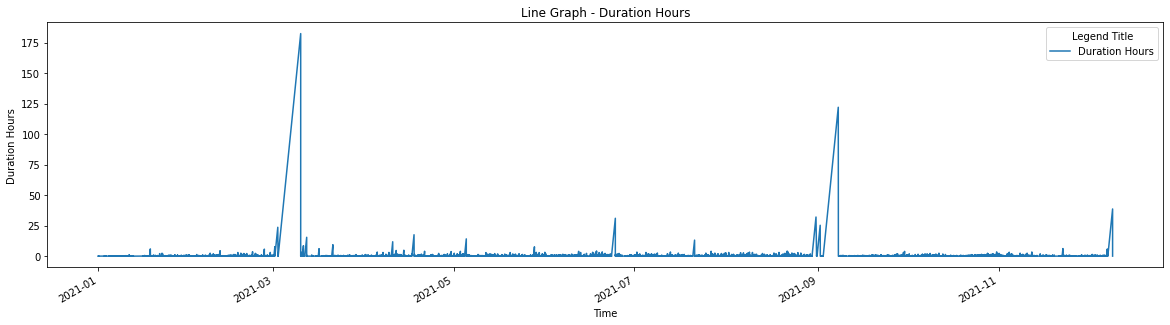

In [23]:
df['Duration Hours'].plot(figsize=(20,5),label = 'Duration Hours')
  
# Add a title to a legend
plt.legend(title = "Legend Title")
plt.title("Line Graph - Duration Hours")
plt.xlabel("Time")
plt.ylabel("Duration Hours")

In [24]:
table3 = pd.DataFrame()
table3 = round(df['Duration Hours'].sort_values(ascending=False),2)[:10]
table3
table3 = table3.to_frame()

In [25]:
html3 = table3.to_html()

# write html to file
text_file = open("table3.html", "w")
text_file.write(html3)
text_file.close()

In [26]:
from IPython.display import HTML
HTML(table3.to_html(classes= 'table table-striped'))

,Duration Hours
LastUpdateTime,
2021-03-10 09:28:10,182.36
2021-09-07 20:03:30,121.99
2021-12-09 10:12:10,38.66
2021-08-31 07:37:42,32.05
2021-06-24 14:11:58,31.03
2021-09-01 17:34:33,25.29
2021-03-02 15:58:48,23.64
2021-04-17 15:32:51,17.54
2021-03-12 10:00:01,15.44


In [27]:
df[df['Duration']>300].count()

FaultCode              54
NumOfStringOnline    8854
MeterPower           8854
FaultCat             8854
Duration             8854
Duration Hours       8854
dtype: int64

In [29]:
df[df['Duration']>300].groupby('FaultCode').sum()/3600

,NumOfStringOnline,MeterPower,FaultCat,Duration,Duration Hours
FaultCode,,,,,
CF1/,0.154167,0.000000,0.000000,37.727222,0.010480
CL2/,0.195833,-0.015101,0.001389,1.856389,0.000516
CTL0/,0.079722,0.000000,0.001111,23.987222,0.006663
CTL0/IF1/,0.076667,-0.003054,0.001667,6.009444,0.001669
CTL0/IF1/IF2/,0.076667,-0.002792,0.002222,0.671111,0.000186
CTL0/IF1/IF3/,0.000000,0.000000,0.000000,0.000000,0.000000
CTL0/IF2/,0.478889,-0.483025,0.020000,2.975833,0.000827
DCF23/,0.000000,0.000000,0.000000,0.000000,0.000000
ESTOP/,0.498611,-0.007786,0.046667,233.322222,0.064812


In [30]:
df_duration = df[['Duration', 'FaultCode']].sort_values('Duration', ascending = 0)

In [31]:
table4 = pd.DataFrame()
table4 = df_duration[:50].groupby('FaultCode').sum()/3600 # top 50 durations with a fault code
#table4 = table4.to_frame()

In [32]:
html4 = table4.to_html()

# write html to file
text_file = open("table4.html", "w")
text_file.write(html4)
text_file.close()

In [33]:
from IPython.display import HTML
HTML(table4.to_html(classes= 'table table-striped'))

,Duration
FaultCode,
CF1/,36.655833
CL2/,0.000000
CTL0/,23.641389
CTL0/IF1/,5.865833
CTL0/IF1/IF2/,0.000000
CTL0/IF1/IF3/,0.000000
CTL0/IF2/,0.000000
DCF23/,0.000000
ESTOP/,224.290556


In [34]:
round(df_duration['Duration'][:10]/(3600*24))

LastUpdateTime
2021-03-10 09:28:10    8.0
2021-09-07 20:03:30    5.0
2021-12-09 10:12:10    2.0
2021-08-31 07:37:42    1.0
2021-06-24 14:11:58    1.0
2021-09-01 17:34:33    1.0
2021-03-02 15:58:48    1.0
2021-04-17 15:32:51    1.0
2021-03-12 10:00:01    1.0
2021-05-05 06:52:52    1.0
Name: Duration, dtype: float64

### Fault Codes in 2021


Counts

In [35]:
count_df = pd.DataFrame()
count_df = df.groupby('FaultCode').count().sort_values(by='Duration', ascending=0)
count_df

,NumOfStringOnline,MeterPower,FaultCat,Duration,Duration Hours
FaultCode,,,,,
THM15/,7607,7607,7607,7607,7607
ESTOP/,100,100,100,100,100
CTL0/IF2/,82,82,82,82,82
CL2/,53,53,53,53,53
CTL0/IF1/,50,50,50,50,50
CTL0/IF1/IF2/,31,31,31,31,31
CTL0/IF1/IF3/,15,15,15,15,15
CF1/,12,12,12,12,12
CTL0/,3,3,3,3,3


In [36]:
sum_counts = count_df["Duration Hours"].sum()
print(sum_counts)

7960


Durations

In [37]:
pcs_fc = df[['FaultCode', 'Duration']].groupby('FaultCode').sum().sort_values(by='Duration', ascending=0)/3600 # in hours

In [38]:
pcs_fc


,Duration
FaultCode,
ESTOP/,234.722222
THM15/,49.900556
CF1/,37.911111
CTL0/,24.004722
SEQ2/ESTOP/,7.745278
CTL0/IF1/,7.121944
CTL0/IF2/,3.225556
CL2/,2.091111
CTL0/IF1/IF2/,1.351389


In [39]:
table2 = pcs_fc.to_html()

# write html to file
text_file = open("table2.html", "w")
text_file.write(table2)
text_file.close()

In [40]:
import codecs
f=codecs.open("table2.html", 'r')
print(f.read())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Duration</th>
    </tr>
    <tr>
      <th>FaultCode</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>ESTOP/</th>
      <td>234.722222</td>
    </tr>
    <tr>
      <th>THM15/</th>
      <td>49.900556</td>
    </tr>
    <tr>
      <th>CF1/</th>
      <td>37.911111</td>
    </tr>
    <tr>
      <th>CTL0/</th>
      <td>24.004722</td>
    </tr>
    <tr>
      <th>SEQ2/ESTOP/</th>
      <td>7.745278</td>
    </tr>
    <tr>
      <th>CTL0/IF1/</th>
      <td>7.121944</td>
    </tr>
    <tr>
      <th>CTL0/IF2/</th>
      <td>3.225556</td>
    </tr>
    <tr>
      <th>CL2/</th>
      <td>2.091111</td>
    </tr>
    <tr>
      <th>CTL0/IF1/IF2/</th>
      <td>1.351389</td>
    </tr>
    <tr>
      <th>SEQ1/</th>
      <td>0.567778</td>
    </tr>
    <tr>
      <th>CTL0/IF1/IF3/</th>
      <td>0.286667</td>
    </tr>
    <tr>
      <th>SEQ2/</th>
      <td>0.09555

In [41]:
from IPython.display import HTML
HTML(pcs_fc.to_html(classes= 'table table-striped'))

,Duration
FaultCode,
ESTOP/,234.722222
THM15/,49.900556
CF1/,37.911111
CTL0/,24.004722
SEQ2/ESTOP/,7.745278
CTL0/IF1/,7.121944
CTL0/IF2/,3.225556
CL2/,2.091111
CTL0/IF1/IF2/,1.351389


Text(0, 0.5, 'Duration Hours')

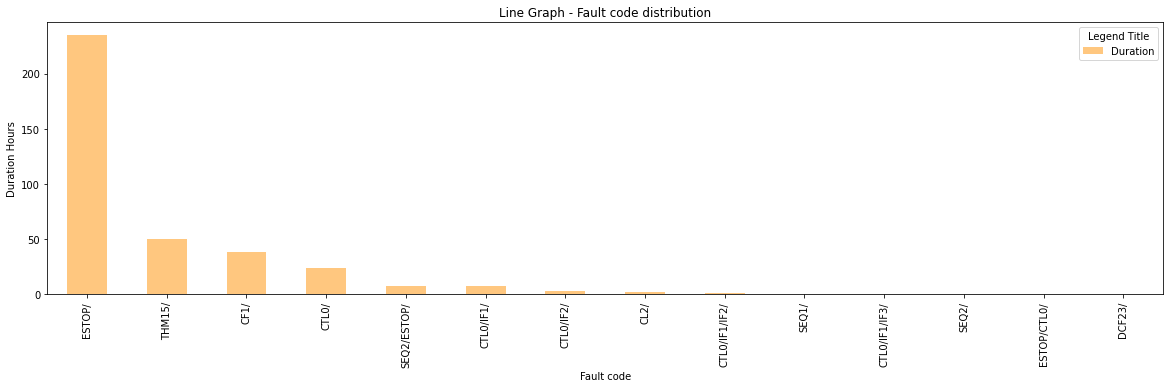

In [42]:
pcs_fc.plot(kind='bar', figsize=(20,5), cmap='copper_r',label = 'Duration Hours')
  
# Add a title to a legend
plt.legend(title = "Legend Title")
plt.title("Line Graph - Fault code distribution")
plt.xlabel("Fault code")
plt.ylabel("Duration Hours")

### Fault Codes Description

Let's assume all codes observed are equivalent to downtime

In [43]:
#@title
pcs_downtime_duration = pcs_fc['Duration'].sum()

In [44]:
#@title
pcs_downtime_duration

369.0869444444445

In [45]:
#@title
pcs_downtime_percent = 100 * pcs_downtime_duration/duration_2021_hours
pcs_uptime_percent = 100 - pcs_downtime_percent

In [46]:
#@title
print('PCS Downtime %', round(pcs_downtime_percent, 2), 'PCS Uptime %', round(pcs_uptime_percent, 2))

PCS Downtime % 4.31 PCS Uptime % 95.69


### Strings mean online

In [47]:
mean_actual_strings_2021 = df['NumOfStringOnline'].mean()
mean_actual_strings_2021

143.08660426466065

Text(0, 0.5, 'nStringsOnline')

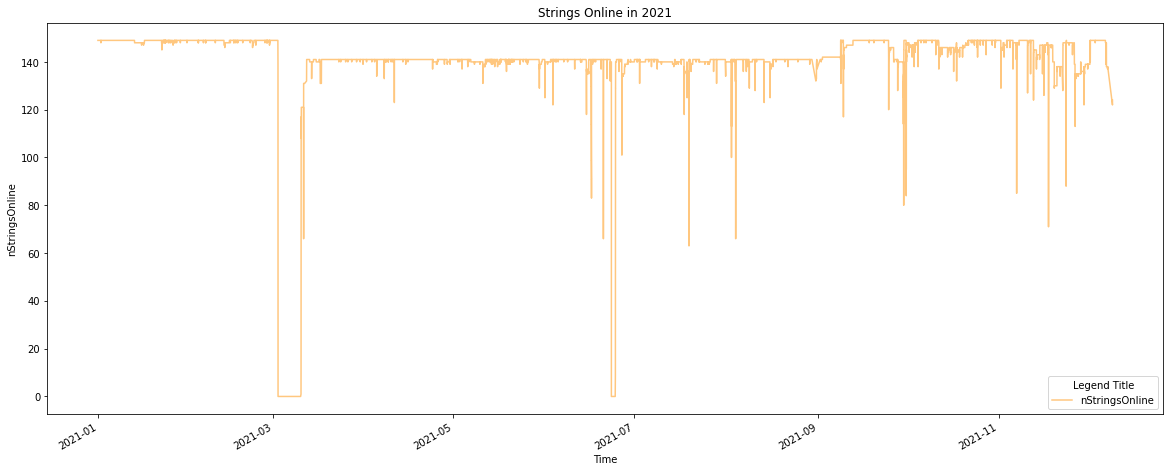

In [48]:
df['NumOfStringOnline'].plot(figsize=(20,8), cmap='copper_r', title='Strings Online in 2021',label = 'nStringsOnline')

# Add a title to a legend
plt.legend(title = "Legend Title",loc='lower right')
plt.xlabel("Time")
plt.ylabel("nStringsOnline")

# Simplified Calculation

Availability = mean(strings) * uptime/maximum uptime (100%) * max strings (151)

In [49]:
availability = mean_actual_strings_2021 * pcs_uptime_percent/MaxStr
print('Availability for 2021:', round(availability, 2), '%')

Availability for 2021: 90.68 %


### Liquidated Damages Calculation ($)

In [50]:
damages = (Guaranteed_Availability - availability) * LD_rate_per_1Percent
print('Damages $', round(damages, 2))

Damages $ 20864.72


In [51]:
Availability_gap = Guaranteed_Availability - availability

In [52]:
table1 = pd.DataFrame()
table1["Parameter"] = ["Availability Gap" , "LD rate per 1% shortfall", "Actual Availability", "Guaranteed Availability", "Mean strings online", "Maximum strings", "Total number of fault codes" , "Total downtime", "Downtime Percent", "Uptime", "Liquidated Damages $"]
table1["Value"] = [Availability_gap , LD_rate_per_1Percent , availability, Guaranteed_Availability, mean_actual_strings_2021, MaxStr, sum_counts, pcs_downtime_duration, pcs_downtime_percent, pcs_uptime_percent, damages ]
table1["Unit"] = ["%","$","%","%","Strings","Strings","Count","Hours","%","%","$"]

In [53]:
html1 = table1.to_html()

# write html to file
text_file = open("table1.html", "w")
text_file.write(html1)
text_file.close()

In [54]:
import codecs
f=codecs.open("table1.html", 'r')
print(f.read())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Parameter</th>
      <th>Value</th>
      <th>Unit</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Availability Gap</td>
      <td>6.322643</td>
      <td>%</td>
    </tr>
    <tr>
      <th>1</th>
      <td>LD rate per 1% shortfall</td>
      <td>3300.000000</td>
      <td>$</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Actual Availability</td>
      <td>90.677357</td>
      <td>%</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Guaranteed Availability</td>
      <td>97.000000</td>
      <td>%</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Mean strings online</td>
      <td>143.086604</td>
      <td>Strings</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Maximum strings</td>
      <td>151.000000</td>
      <td>Strings</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Total number of fault codes</td>
      <td>7960.000000</td>
      <td>Cou

In [55]:
from IPython.display import HTML
HTML(table1.to_html(classes= 'table table-striped'))

,Parameter,Value,Unit
0,Availability Gap,6.322643,%
1,LD rate per 1% shortfall,3300.000000,$
2,Actual Availability,90.677357,%
3,Guaranteed Availability,97.000000,%
4,Mean strings online,143.086604,Strings
5,Maximum strings,151.000000,Strings
6,Total number of fault codes,7960.000000,Count
7,Total downtime,369.086944,Hours
8,Downtime Percent,4.307737,%
9,Uptime,95.692263,%
